In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from sklearn.metrics import accuracy_score
print(tf.__version__)
import os

2.4.1


In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4458315592342554573
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3044750132
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6279956651600705330
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
def convert_bytes(size, unit=None):
    if unit == "KB":
        return str(round(size / 1024, 3))
    elif unit == "MB":
        return str(round(size / (1024 * 1024), 3)) 
    else:
        return print('File size: ' + str(size) + ' bytes')

In [4]:
device=tf.test.gpu_device_name()
print(device)

/device:GPU:0


In [5]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



In [9]:
np.isnan(x_train).any()

False

In [10]:
np.isnan(x_train).any()

False

In [11]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [12]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [13]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [14]:
batch_size = 16
num_classes = 10
epochs = 5

In [15]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
    
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='softmax'),
# ])

# model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
#             loss='categorical_crossentropy', metrics=['acc'])

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [17]:
with tf.device('/gpu:0'):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5
3125/3125 [==============================] - 40s 12ms/step - loss: 1.9529 - acc: 0.2658
Epoch 2/5
3125/3125 [==============================] - 42s 13ms/step - loss: 1.4312 - acc: 0.4807
Epoch 3/5
3125/3125 [==============================] - 49s 16ms/step - loss: 1.2466 - acc: 0.5559
Epoch 4/5
3125/3125 [==============================] - 55s 18ms/step - loss: 1.1097 - acc: 0.6101
Epoch 5/5
3125/3125 [==============================] - 61s 20ms/step - loss: 1.0030 - acc: 0.6486


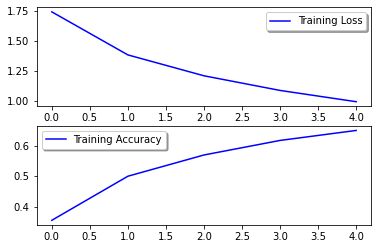

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
# test_loss, test_acc = model.evaluate(x_test, y_test)

In [20]:
# # Predict the values from the validation dataset
# y_pred = model.predict(x_test)
# # Convert predictions classes to one hot vectors 
# y_pred_classes = np.argmax(y_pred,axis = 1) 
# # Convert validation observations to one hot vectors
# y_true = np.argmax(y_test,axis = 1)
# # compute the confusion matrix
# confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

In [21]:
# plt.figure(figsize=(12, 9))
# c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
# c.set(xticklabels=classes, yticklabels=classes)

In [22]:
# model.save("./cifar.h5")

In [23]:
model=tf.keras.models.load_model("./cifar.h5")
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6489 - acc: 0.7795


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [25]:
test_acc

0.7795000076293945

In [26]:
converter=tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model=converter.convert()

In [27]:
converter=tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations=[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model=converter.convert()

In [28]:
interpreter= tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()




In [29]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 32, 32,3))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    32    32     3]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [30]:
test_imgs_numpy = np.array(x_test, dtype=np.float32)

In [31]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [32]:
tflite_model_acc = accuracy_score(prediction_classes, np.argmax(y_test,axis=1))


In [33]:
interpreter= tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()

In [34]:
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 32 32  3]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [35]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 32, 32,3))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    32    32     3]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [36]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [37]:
tflite_model_quant_acc = accuracy_score(prediction_classes, np.argmax(y_test,axis=1))


In [38]:
keras_model_size = get_file_size("cifar.h5")

In [39]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"
open(TF_LITE_MODEL_FILE_NAME, "wb").write(tflite_model)
keras_model_tflite_size=get_file_size("tf_lite_model.tflite")

In [40]:
TF_LITE_MODEL_FLOAT_16_FILE_NAME = "tf_lite_float_16_model.tflite"
keras_model_tflite_quant_size=open(TF_LITE_MODEL_FLOAT_16_FILE_NAME, "wb").write(tflite_quant_model)

In [41]:
print("tf model accuracy:",test_acc)
print("tflite model accuracy:",tflite_model_acc)
print("tflite quant model accuracy:",tflite_model_quant_acc)

tf model accuracy: 0.7795000076293945
tflite model accuracy: 0.779
tflite quant model accuracy: 0.779


In [42]:
print("Keras model size",convert_bytes(keras_model_size,"KB"))
print("Keras tflite model size",convert_bytes(keras_model_tflite_size,"KB"))
print("Keras tflite quant model size",convert_bytes(keras_model_tflite_quant_size,"KB"))


Keras model size 9829.492
Keras tflite model size 4889.426
Keras tflite quant model size 2447.766


In [43]:
print("model size",convert_bytes(keras_model_size,"MB"))
print("tflite model size",convert_bytes(keras_model_tflite_size,"MB"))
print("tflite quant model size",convert_bytes(keras_model_tflite_quant_size,"MB"))


model size 9.599
tflite model size 4.775
tflite quant model size 2.39
